# **연관 규칙 분석 실습**

## **Aprior 실습**

분석에 필요한 라이브러리를 불러온다.

In [93]:
%load_ext watermark
%watermark -v -p sklearn,mlxtend,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.18.1

sklearn: 0.0
mlxtend: 0.18.0
pandas : 1.0.5



In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
# !pip install mlxtend

In [96]:
import pandas as pd
import mlxtend

이 실습에서는 타이타닉 생존자, 희생자 데이터를 분석하고자 합니다. <br> 실습을 위해서 ```titanic.txt```파일을 활용해보도록 하겠습니다..

In [97]:
titanic = pd.read_table('./data/titanic.txt')
titanic.shape # 읽어온 데이터 구조 확인

(1313, 5)

head 함수를 통해 상위 데이터를 조회해봅니다.

In [98]:
titanic.head() # 가장 앞 5개의 데이터를 출력

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


**head() 함수**와 달리 **tail() 함수**는 가장 마지막 5개의 데이터를 출력해줍니다.

In [99]:
titanic.tail() # 가장 뒤 5개의 데이터를 출력

,Name,PClass,Age,Sex,Survived
1308,"Zakarian, Mr Artun",3rd,27.0,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0
1312,"Zimmerman, Leo",3rd,29.0,male,0


Name 열은 분석에서 사용하지 않을 것이기 때문에 제거합니다.

In [100]:
# Remove "Name" column
titanic_ar = titanic.iloc[:, 1:5]
titanic_ar.head()

,PClass,Age,Sex,Survived
0,1st,29.00,female,1
1,1st,2.00,female,0
2,1st,30.00,male,0
3,1st,25.00,female,0
4,1st,0.92,male,1


현재 나이 정보를 담고 있는 Age 열은 숫자형으로 나이를 담고 있습니다. <br> 
연관 규칙 분석을 위해 이 변수를 명목형 변수로 변환할 필요가 있습니다.<br> 
20세 이상인 경우는 Adult, 20세 미만인 경우 Child, 정보가 없는 경우 Unknown으로 구성하겠습니다.

In [101]:
# Age를 명목형 변수로 변경
c_idx = titanic_ar.loc[:,'Age'] < 20
a_idx = titanic_ar.loc[:,'Age'] >= 20
na_idx = titanic_ar.loc[:,'Age'].isnull()

In [102]:
titanic_ar.loc[c_idx,'Age'] = 'Child'
titanic_ar.loc[a_idx,'Age'] = 'Adult'
titanic_ar.loc[na_idx,'Age'] = 'Unknown'

In [103]:
titanic_ar.head(20) # 변경된 데이터 확인

,PClass,Age,Sex,Survived
0,1st,Adult,female,1
1,1st,Child,female,0
2,1st,Adult,male,0
3,1st,Adult,female,0
4,1st,Child,male,1
5,1st,Adult,male,1
6,1st,Adult,female,1
7,1st,Adult,male,0
8,1st,Adult,female,1
9,1st,Adult,male,0


생존 정보를 담고 있는 열도 위와 마찬가지로 명목형 변수로 변환을 수행합니다.  
생존자의 경우 'Survived', 희생자의 경우 'Died'로 변환합니다.

In [104]:
survived_idx = titanic_ar.loc[:,'Survived'] == 1
dead_idx = titanic_ar.loc[:,'Survived'] == 0
titanic_ar.loc[survived_idx,'Survived'] = 'Survived'
titanic_ar.loc[dead_idx,'Survived'] = 'Died'

연관 규칙 분석을 위해서는 ```mlxtend``` 패키지에서 제공하는 ```apriori()``` 함수를 통해서 수행이 가능합니다.

In [105]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

mlxtend는 One-hot 인코딩된 데이터 프레임을 입력으로 받기 때문에, 위에서 구성한 데이터를 입력 형태에 맞게 변환합니다.

In [106]:
dataset = titanic_ar.values.tolist()
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset).astype("int")
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,1st,2nd,3rd,Adult,Child,Died,Survived,Unknown,female,male
0,1,0,0,1,0,0,1,0,1,0
1,1,0,0,0,1,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1308,0,0,1,1,0,1,0,0,0,1
1309,0,0,1,1,0,1,0,0,0,1
1310,0,0,1,1,0,1,0,0,0,1
1311,0,0,1,1,0,1,0,0,0,1


<img src = "./fig/1_transaction형태.PNG" width="60%">

위에서 작성한 입력 데이터 프레임을 이용하여 apriori 알고리즘으로 빈발 아이템셋을 구합니다.

In [107]:
frequent_itemsets = apriori(df, use_colnames=True,min_support=0.1)
frequent_itemsets

,support,itemsets
0,0.245240,(1st)
1,0.213252,(2nd)
2,0.541508,(3rd)
3,0.462300,(Adult)
4,0.113481,(Child)
5,0.657273,(Died)
6,0.342727,(Survived)
7,0.424219,(Unknown)
8,0.351866,(female)
9,0.648134,(male)


위에서 구한 빈발 아이템셋을 이용하여 confidence가 0.8 이상인 연관 규칙을 찾아보도록 하겠습니다.  
결과 데이터 프레임에서 support, confidence, lift 값을 확인할 수 있습니다.

<img src='./fig/3_support.PNG' width=60%>

<img src='./fig/4_confidence.PNG' width=60%>

<img src='./fig/5_lift.PNG' width=60%>

In [108]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3rd),(Died),0.541508,0.657273,0.436405,0.805907,1.226137,0.080486,1.765787
1,(male),(Died),0.648134,0.657273,0.539985,0.833137,1.267566,0.113983,2.053946
2,(Died),(male),0.657273,0.648134,0.539985,0.821553,1.267566,0.113983,1.971820
3,"(female, 1st)",(Survived),0.108911,0.342727,0.102056,0.937063,2.734141,0.064730,10.443344
4,"(male, 2nd)",(Died),0.131759,0.657273,0.112719,0.855491,1.301576,0.026117,2.371668
5,"(2nd, Died)",(male),0.122620,0.648134,0.112719,0.919255,1.418309,0.033245,4.357725
6,"(3rd, Unknown)",(Died),0.299315,0.657273,0.253618,0.847328,1.289156,0.056886,2.244859
7,"(female, Died)",(3rd),0.117289,0.541508,0.100533,0.857143,1.582881,0.037020,3.209444
8,"(3rd, male)",(Died),0.380046,0.657273,0.335872,0.883768,1.344596,0.086078,2.948630
9,"(male, Adult)",(Died),0.300838,0.657273,0.248286,0.825316,1.255667,0.050554,1.961985


<img src='./fig/2_연관규칙분석용어.PNG' width=60%>

#### 이번에는 lift 값이 1.2 이상인 규칙을 찾아보겠습니다.

In [109]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adult),(1st),0.462300,0.245240,0.155369,0.336079,1.370409,0.041995,1.136822
1,(1st),(Adult),0.245240,0.462300,0.155369,0.633540,1.370409,0.041995,1.467283
2,(Survived),(1st),0.342727,0.245240,0.146992,0.428889,1.748854,0.062941,1.321564
3,(1st),(Survived),0.245240,0.342727,0.146992,0.599379,1.748854,0.062941,1.640636
4,(female),(1st),0.351866,0.245240,0.108911,0.309524,1.262127,0.022619,1.093101
...,...,...,...,...,...,...,...,...,...
65,"(Unknown, Died)","(3rd, male)",0.319878,0.380046,0.195735,0.611905,1.610082,0.074167,1.597428
66,"(male, Died)","(3rd, Unknown)",0.539985,0.299315,0.195735,0.362482,1.211042,0.034110,1.099084
67,(3rd),"(Unknown, male, Died)",0.541508,0.256664,0.195735,0.361463,1.408310,0.056749,1.164123
68,(Unknown),"(3rd, male, Died)",0.424219,0.335872,0.195735,0.461400,1.373738,0.053252,1.233064


규칙의 원인의 개수를 이용하여 규칙을 필터링 할 수 있도록, 원인의 개수를 구하여 규칙 데이터프레임에 추가합니다.

In [110]:
# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(Adult),(1st),0.462300,0.245240,0.155369,0.336079,1.370409,0.041995,1.136822,1
1,(1st),(Adult),0.245240,0.462300,0.155369,0.633540,1.370409,0.041995,1.467283,1
2,(Survived),(1st),0.342727,0.245240,0.146992,0.428889,1.748854,0.062941,1.321564,1
3,(1st),(Survived),0.245240,0.342727,0.146992,0.599379,1.748854,0.062941,1.640636,1
4,(female),(1st),0.351866,0.245240,0.108911,0.309524,1.262127,0.022619,1.093101,1
...,...,...,...,...,...,...,...,...,...,...
65,"(Unknown, Died)","(3rd, male)",0.319878,0.380046,0.195735,0.611905,1.610082,0.074167,1.597428,2
66,"(male, Died)","(3rd, Unknown)",0.539985,0.299315,0.195735,0.362482,1.211042,0.034110,1.099084,2
67,(3rd),"(Unknown, male, Died)",0.541508,0.256664,0.195735,0.361463,1.408310,0.056749,1.164123,1
68,(Unknown),"(3rd, male, Died)",0.424219,0.335872,0.195735,0.461400,1.373738,0.053252,1.233064,1


위에서 추가한 정보를 바탕으로 원인의 길이가 2개 이상, Confidence가 0.75이상, lift가 1.2 이상인 규칙을 출력합니다.

In [111]:
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
17,"(female, 1st)",(Survived),0.108911,0.342727,0.102056,0.937063,2.734141,0.064730,10.443344,2
22,"(male, 2nd)",(Died),0.131759,0.657273,0.112719,0.855491,1.301576,0.026117,2.371668,2
23,"(2nd, Died)",(male),0.122620,0.648134,0.112719,0.919255,1.418309,0.033245,4.357725,2
26,"(3rd, Adult)",(Died),0.178218,0.657273,0.141660,0.794872,1.209347,0.024522,1.670792,2
28,"(3rd, Unknown)",(Died),0.299315,0.657273,0.253618,0.847328,1.289156,0.056886,2.244859,2
30,"(Unknown, Died)",(3rd),0.319878,0.541508,0.253618,0.792857,1.464165,0.080401,2.213410,2
34,"(female, Died)",(3rd),0.117289,0.541508,0.100533,0.857143,1.582881,0.037020,3.209444,2
36,"(3rd, male)",(Died),0.380046,0.657273,0.335872,0.883768,1.344596,0.086078,2.948630,2
42,"(male, Adult)",(Died),0.300838,0.657273,0.248286,0.825316,1.255667,0.050554,1.961985,2
43,"(Adult, Died)",(male),0.285605,0.648134,0.248286,0.869333,1.341286,0.063176,2.692852,2


희생자들의 특징을 파악하기 위해 조건을 줘서 규칙을 검색합니다.

In [112]:
# 희생자에 대한 Rule 분석
rules[ (rules['confidence'] > 0.75) &
       (rules['consequents'] == frozenset({'Died'})) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
8,(3rd),(Died),0.541508,0.657273,0.436405,0.805907,1.226137,0.080486,1.765787,1
12,(male),(Died),0.648134,0.657273,0.539985,0.833137,1.267566,0.113983,2.053946,1
22,"(male, 2nd)",(Died),0.131759,0.657273,0.112719,0.855491,1.301576,0.026117,2.371668,2
26,"(3rd, Adult)",(Died),0.178218,0.657273,0.141660,0.794872,1.209347,0.024522,1.670792,2
28,"(3rd, Unknown)",(Died),0.299315,0.657273,0.253618,0.847328,1.289156,0.056886,2.244859,2
36,"(3rd, male)",(Died),0.380046,0.657273,0.335872,0.883768,1.344596,0.086078,2.948630,2
42,"(male, Adult)",(Died),0.300838,0.657273,0.248286,0.825316,1.255667,0.050554,1.961985,2
50,"(Unknown, male)",(Died),0.291698,0.657273,0.256664,0.879896,1.338706,0.064939,2.853571,2
54,"(3rd, male, Adult)",(Died),0.131759,0.657273,0.114242,0.867052,1.319165,0.027640,2.577900,3
58,"(3rd, Unknown, male)",(Died),0.215537,0.657273,0.195735,0.908127,1.381658,0.054068,3.730447,3


## **실제 장바구니데이터를 통한 실습**

장바구니 분석 예제를 위해 다음 명령어로 필요한 라이브러리를 설치합니다.<br><br>


In [114]:
%load_ext watermark
%watermark -v -p pytagcloud,pygame,simplejson

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.18.1

pytagcloud: 0.3.5
pygame    : 2.0.1
simplejson: 3.17.2



In [115]:
# !pip install pytagcloud pygame simplejson

분석할 데이터 파일을 불러 오고, 데이터의 수를 확인합니다.

In [116]:
transaction = open('./data/groceries.csv','r').readlines()
len(transaction)
gloceries = []
for line in transaction:
    line = line.replace('\n','').split(',')
    gloceries.append(line)
len(gloceries) # 불러온 데이터 수 확인

9835

In [117]:
gloceries[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals']]

분석에 필요한 라이브러리를 로드합니다.

In [118]:
from collections import Counter
import pytagcloud
import itertools

불러온 데이터의 특징을 파악하기 위해 Word Cloud를 그려보도록 하겠습니다.

In [119]:
nouns = list(itertools.chain(*gloceries))
count = Counter(nouns)
tag2 = count.most_common(100)
taglist = pytagcloud.make_tags(tag2, maxsize=80)
pytagcloud.create_tag_image(taglist, './wordcloud.jpg', size=(1024, 768), fontname='Coustard', rectangular=False)

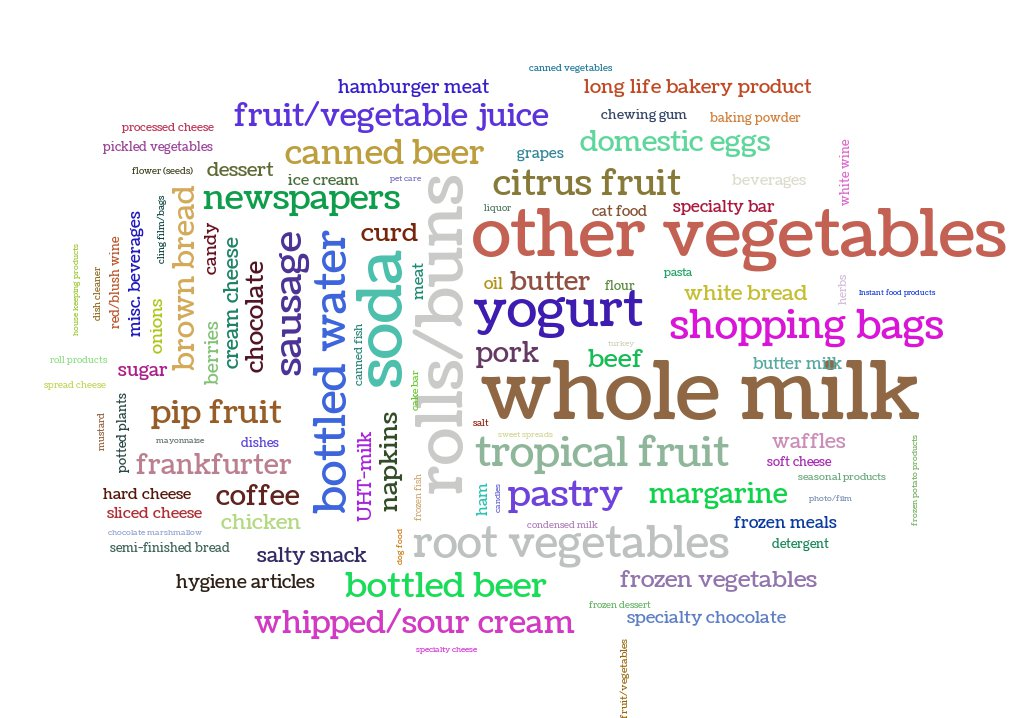

In [120]:
from IPython.display import Image
Image("./wordcloud.jpg")

각 항목들이 어느 정도의 비중을 갖고 있는지 히스토그램으로 상위 30개에 대해 확인해 보겠습니다.

In [121]:
# Plot histogram using matplotlib bar().
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

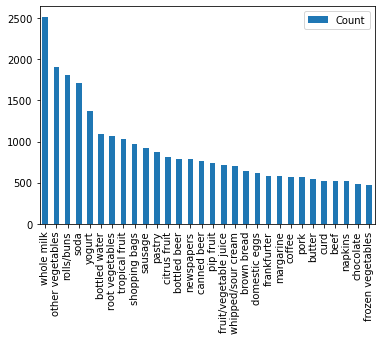

In [122]:
df = pd.DataFrame.from_dict(count, orient='index')
df.columns = ['Count']
view = df.sort_values('Count',ascending=False)[0:30]
%matplotlib inline
view.plot(kind='bar')

앞선 타이타닉 예제와 마찬가지로 분석을 위해 One-hot 인코딩된 형태로 데이터 프레임을 생성합니다.

In [123]:
oht = TransactionEncoder()
oht_ary = oht.fit(gloceries).transform(gloceries).astype('int')
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


빈발 아이템 셋을 구합니다.

In [124]:
frequent_itemsets = apriori(df, use_colnames=True,min_support=0.01)
frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(whole milk, root vegetables, tropical fruit)"
329,0.014540,"(yogurt, whole milk, root vegetables)"
330,0.010473,"(yogurt, whole milk, soda)"
331,0.015150,"(yogurt, whole milk, tropical fruit)"


앞서 구한 빈발 아이템셋을 이용하여 confidence가 0.5 이상인 연관 규칙을 확인해보도록 하겠습니다.

In [125]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
3,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003
5,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
8,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239
9,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340


lift가 2 이상인 연관 규칙을 찾고, 원인 절의 길이 정보를 갖는 열을 추가합니다.

In [126]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.0)
# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,1
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,1
2,(yogurt),(berries),0.139502,0.033249,0.010574,0.075802,2.279848,0.005936,1.046043,1
3,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807,1
4,(root vegetables),(butter),0.108998,0.055414,0.012913,0.118470,2.137897,0.006873,1.071530,1
...,...,...,...,...,...,...,...,...,...,...
155,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,2
156,"(whipped/sour cream, whole milk)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943,2
157,(yogurt),"(whipped/sour cream, whole milk)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627,1
158,(whipped/sour cream),"(yogurt, whole milk)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881,1


lift 기준으로 상위 10개의 규칙을 내림차순으로 표시합니다.

In [127]:
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
69,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,1
64,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,2
50,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,2
55,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,1
121,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206,2
124,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697,1
96,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776,1
93,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705,2
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,1
0,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,1
